# Predicting house price using regression techniques

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [31]:
#reading all the files as dataframes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [32]:
print("shape of train: ", train.shape)
print("shape of test: ",test.shape)
print("shape of submission: ",sub.shape)

shape of train:  (1460, 81)
shape of test:  (1459, 80)
shape of submission:  (1459, 2)


In [45]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
#Check and drop Id column in train and test
if(train['Id'].nunique() == len(train) and test['Id'].nunique() == len(test)):
    train_id, test_id = train['Id'], test['Id']
    train.drop('Id', axis = 1, inplace = True)
    test.drop('Id', axis = 1, inplace = True)

#### Let's get the dependent variable and its descriptive statistics

In [40]:
for c in train.columns:
    if c not in test.columns:
        print("The dependent variable is %s " %c)

train[c].describe()

The dependent variable is SalePrice 


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

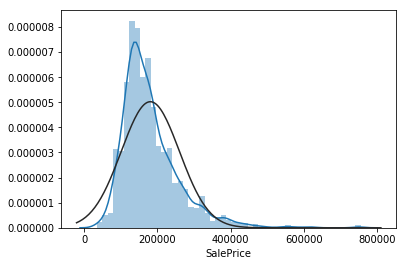

1.8828757597682129


In [71]:
sns.distplot(train['SalePrice'], fit = norm)
plt.show()
print(train['SalePrice'].skew())

In [13]:
#datatypes of columns
print("Datatypes of columns: ")
print(train.dtypes.value_counts())
print('\n')
print("Datatype of response variable: ", train['SalePrice'].dtype)
print("Datatype of id: ", train['Id'].dtype)

Datatypes of columns: 
object     43
int64      35
float64     3
dtype: int64


Datatype of response variable:  int64
Datatype of id:  int64


In [18]:
#check for missing values
print(train.isnull().sum(axis=0).sort_values(ascending=False).head(10))
print('-'*20)
train.isnull().sum(axis=0).sort_values(ascending=False).tail(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64
--------------------


BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
SaleCondition    0
Heating          0
TotalBsmtSF      0
Id               0
dtype: int64

Dependent variable is: SalePrice
